<a href="https://colab.research.google.com/github/krsha-nit/PyTorch/blob/main/2_Linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data) # it's a bunch object, basically a dict where you can treat the keys like attributes

sklearn.utils._bunch.Bunch

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data.shape, data.target.shape

((569, 30), (569,))

In [5]:
data.target[:5]

array([0, 0, 0, 0, 0])

In [9]:
data.target_names, data.feature_names

(array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
N,D = X_train.shape

In [11]:
# scale the data (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# convert the data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1)) # converting to 2-d array
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [13]:
# 1. create the model

## model architect
model = nn.Sequential(
    nn.Linear(D,1), #inputs = D(#features), output = 1(0 or 1)
    nn.Sigmoid()
)
## loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [14]:
# 2. train the model
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
  ## zero the parameter gradient
  optimizer.zero_grad()
  ## forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
  ## backward pass and optimize
  loss.backward()
  optimizer.step()
  ## get test losses
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)
  ## saving the losses
  train_losses[epoch] = loss.item()
  test_losses[epoch] = loss_test.item()

  if (epoch+1)%50 == 0:
    print(f"Epoch {epoch+1}/{n_epochs}, train_loss: {loss.item():.4f}, test_loss: {loss_test.item():.4f}")

Epoch 50/1000, train_loss: 0.4997, test_loss: 0.5024
Epoch 100/1000, train_loss: 0.3647, test_loss: 0.3728
Epoch 150/1000, train_loss: 0.2925, test_loss: 0.3028
Epoch 200/1000, train_loss: 0.2480, test_loss: 0.2586
Epoch 250/1000, train_loss: 0.2180, test_loss: 0.2278
Epoch 300/1000, train_loss: 0.1963, test_loss: 0.2050
Epoch 350/1000, train_loss: 0.1798, test_loss: 0.1874
Epoch 400/1000, train_loss: 0.1668, test_loss: 0.1733
Epoch 450/1000, train_loss: 0.1562, test_loss: 0.1618
Epoch 500/1000, train_loss: 0.1475, test_loss: 0.1521
Epoch 550/1000, train_loss: 0.1401, test_loss: 0.1439
Epoch 600/1000, train_loss: 0.1338, test_loss: 0.1369
Epoch 650/1000, train_loss: 0.1283, test_loss: 0.1308
Epoch 700/1000, train_loss: 0.1235, test_loss: 0.1254
Epoch 750/1000, train_loss: 0.1193, test_loss: 0.1207
Epoch 800/1000, train_loss: 0.1155, test_loss: 0.1164
Epoch 850/1000, train_loss: 0.1121, test_loss: 0.1126
Epoch 900/1000, train_loss: 0.1090, test_loss: 0.1092
Epoch 950/1000, train_loss: 0

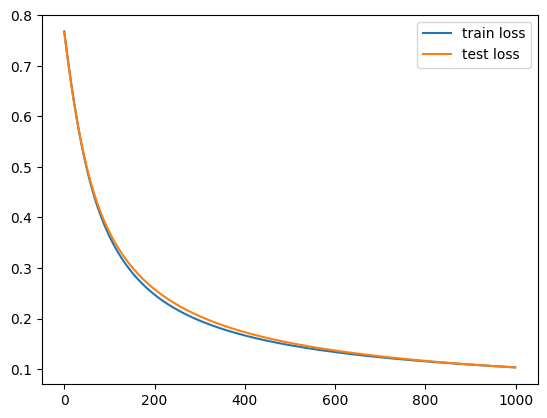

In [15]:
## loss curve
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [16]:
# 3. Preditions
## getting accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy()==p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train accuracy: {train_acc}, Test accuracy: {test_acc}")

Train accuracy: 0.9816272965879265, Test accuracy: 0.9787234042553191


- HW: How to plot accuracy plot per iteration for test and train datasets?

In [20]:
## Save and load model
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1738, -0.5190, -0.3688, -0.1776, -0.1023, -0.1363, -0.4165, -0.2205,
                       -0.1175,  0.4459, -0.2297, -0.0955, -0.2198, -0.2252, -0.0375,  0.2032,
                       -0.0084, -0.4127,  0.2894,  0.5164, -0.3267, -0.3084, -0.4006, -0.4449,
                       -0.4729, -0.3304, -0.4615, -0.3794, -0.5431, -0.0178]])),
             ('0.bias', tensor([0.6361]))])

In [21]:
### saving the model
torch.save(model.state_dict(),"lin_classification.pt")

In [23]:
### loading the model
model2 = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load("lin_classification.pt"))

<All keys matched successfully>

In [24]:
## evaluating the new model
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy()==p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train accuracy: {train_acc}, Test accuracy: {test_acc}")

Train accuracy: 0.9816272965879265, Test accuracy: 0.9787234042553191
